<font color="blue"><h1>Exercício Final</h1>

1) Qual a idade média das pessoas no cadastro?</br>
2) Quantos homens tem no cadastro?</br>
3) Quantas mulheres tem no cadastro?</br>
4) Qual a idade média dos homens e das mulheres?</br>
5) Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro.</br>
6) Mostre a Média Salarial do cadastro.</br>
7) Quem tem o maior salário?</br>
8) Tirando desempregado quem recebe menos?</br>
9) Quantas pessoas gostam de caminhar no final de semana?</br>
10) Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte.</br>
11) Crie um mapa de calor.</br>
12) Mostre de forma gráfica a distribuição de estados do cadastro.</br>

In [7]:
# Importar a tabela de CADASTRO
import pandas as pd

cadastro_df = pd.read_csv('cadastro - cadastro.csv')
cadastro_df.head()

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior
3,João,Aparecido,1950,m,Monte Alto,Gerente de Projeto,3,Viuvo,2,Nã faço nada,NaN,-,NaN,sim,Ensino Superior
4,Marta,da Silva,1983,f,São Caetano,Auxiliar de Enfermagem,2,Solteira,0,caminhar,sim,crossfit,4.0,não,Ensimo Tecnico


In [8]:
# Questão 1 - Qual a idade média das pessoas no cadastro?

cadastro_df = pd.read_csv('cadastro - cadastro.csv')

idade_df = cadastro_df[['ano_nascimento']].mean() 

print('Idade média das pessoas baseado no', round(2020 - idade_df))

Idade média das pessoas baseado no ano_nascimento    33.0
dtype: float64


In [9]:
# Questão 2 - Quantos homens tem no cadastro?

novo_cadastro_df = cadastro_df[['sexo', 'nome']].loc[cadastro_df.sexo == 'm'].replace('m','Qtd').groupby('sexo').count()

novo_cadastro_df

,nome
sexo,
Qtd,16


In [10]:
# Questão 3 - Quantas mulheres tem no cadastro?

novo_cadastro_df = cadastro_df[['sexo', 'nome']].loc[cadastro_df.sexo == 'f'].replace('f','Qtd').groupby('sexo').count()

novo_cadastro_df

,nome
sexo,
Qtd,14


In [11]:
# Questão 4 - Qual a idade média dos homens e das mulheres?

idade_f = cadastro_df[['ano_nascimento']].loc[cadastro_df.sexo == 'f'].mean()

idade_m = cadastro_df[['ano_nascimento']].loc[cadastro_df.sexo == 'm'].mean()

print('Média das mulheres baseado no', round(2020 - idade_f))

print('Média dos homens baseado no', round(2020 - idade_m))

Média das mulheres baseado no ano_nascimento    34.0
dtype: float64
Média dos homens baseado no ano_nascimento    32.0
dtype: float64


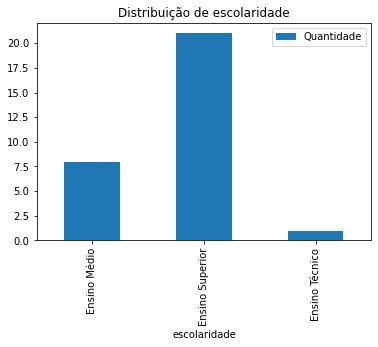

In [23]:
# Questão 5 - Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro.

dist_df = pd.read_csv('cadastro - cadastro.csv')

cadastro_df = df[['escolaridade']]

novo_cadastro = cadastro_df.replace('ensino médio', 'Ensino Médio').replace('ensino Médio','Ensino Médio').replace('ensino superior','Ensino Superior').replace('Ensimo Tecnico','Ensino Técnico')

novo_cadastro

novo_cadastro['Quantidade'] = 1

novo_cadastro[['escolaridade','Quantidade']].groupby('escolaridade').sum().plot(kind='bar' , title = 'Distribuição de escolaridade')


In [24]:
# Questão 6 - Mostre a Média Salarial do cadastro.

# Importar tabela SALÁRIO - PROFISSÕES
import pandas as pd

salario_df = pd.read_csv('salario - profissoes.csv')

cadastro_df = pd.read_csv('cadastro - cadastro.csv')

novo_salario_df = salario_df.rename(columns={'Profissões': 'profissão'}).rename(columns={'salaior +3 anos': 'salário superior a 3 anos'})

salario_df = novo_salario_df[['profissão','salario até 3 anos']]

superior_salario_df = novo_salario_df[['profissão','salário superior a 3 anos']]

novo_cadastro_df = cadastro_df[['nome','profissão']]

print('Média',round(novo_cadastro_df.merge(salario_df, left_on='profissão', right_on='profissão').mean()))

print('Média',round(novo_cadastro_df.merge(superior_salario_df, left_on='profissão', right_on='profissão').mean(),2))


Média salario até 3 anos    3486.0
dtype: float64
Média salário superior a 3 anos    6103.45
dtype: float64


In [60]:
# Questão 7 - Quem tem o maior salário?

salario_df = pd.read_csv('salario - profissoes.csv')

cadastro_df = pd.read_csv('cadastro - cadastro.csv')

novo_salario_df = salario_df.rename(columns={'Profissões': 'profissão'}).rename(columns={'salaior +3 anos': 'salario_acima_3_anos'}).rename(columns={'salario até 3 anos': 'salario_ate_3_anos'})

salario_df = novo_salario_df[['profissão','salario_ate_3_anos']]

acima_salario_df = novo_salario_df[['profissão','salario_acima_3_anos']]

novo_cadastro_df = cadastro_df[['nome','profissão']]

max_ate_3_salarios_df = novo_cadastro_df.merge(salario_df, left_on='profissão', right_on='profissão')

max_maior_3_salarios_df = novo_cadastro_df.merge(acima_salario_df, left_on='profissão', right_on='profissão')

# Precisa saber qual é o maior salário para pegar o nome.

#print('O maior salário até 3 anos é R$',max_ate_3_salarios_df['salario_ate_3_anos'].max())

max_ate_3_salarios_df.loc[(max_ate_3_salarios_df.salario_ate_3_anos == 12000)]


,nome,profissão,salario_ate_3_anos
9,Mirtes,Médica,12000


In [66]:
# Questão 8 - Tirando desempregado quem recebe menos?




In [29]:
# Questão 9 - Quantas pessoas gostam de caminhar no final de semana?

with open ("cadastro - cadastro.csv","r", encoding = 'utf-8') as cadastro_novo:
    caminhar = cadastro_novo.read().count('caminhar')

caminhar

4

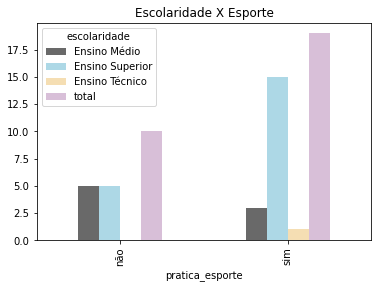

In [52]:
# Questão 10 - Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte.

import numpy as np

import matplotlib.pyplot as plt

novo_df = pd.read_csv('cadastro - cadastro.csv')

cadastro_df = novo_df[['escolaridade','pratica_esporte']]

novo_cadastro = cadastro_df.replace('ensino médio', 'Ensino Médio').replace('ensino Médio','Ensino Médio').replace('ensino superior','Ensino Superior').replace('Ensimo Tecnico','Ensino Técnico')

crosstab_vg = pd.crosstab(novo_cadastro['pratica_esporte'], novo_cadastro['escolaridade'])

crosstab_vg['total'] = crosstab_vg.sum(axis=1)

crosstab_vg.plot(kind='bar' , title = 'Escolaridade X Esporte', color = ['#696969','#ADD8E6','#F5DEB3','#D8BFD8'])

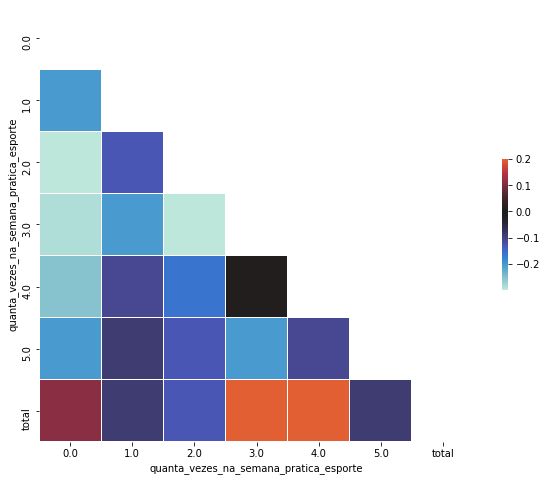

In [50]:
# Questão 11 - Crie um mapa de calor.

from string import ascii_letters

import numpy as np

import pandas as pd

import seaborn as sb

import matplotlib.pyplot as plt

df = pd.read_csv('cadastro - cadastro.csv')

mapa_df = pd.crosstab(df['nome'],df['quanta_vezes_na_semana_pratica_esporte'])

mapa_df['total'] = mapa_df.sum(axis=1)

corr = mapa_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(10, 8))

sb.heatmap(corr, mask=mask, vmax=.2, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .3})

<ipython-input-51-29dd5e623240>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadastro_df['Quantidade'] = 1


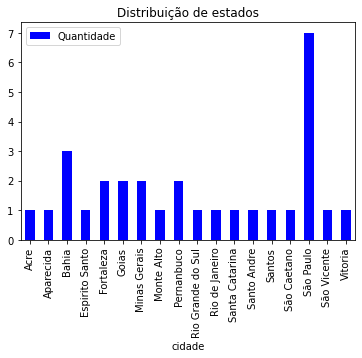

In [51]:
# Questão 12 - Mostre de forma gráfica a distribuição de estados do cadastro.

novo_df = pd.read_csv('cadastro - cadastro.csv')

cadastro_df = novo_df[['cidade']]

cadastro_df['Quantidade'] = 1

cadastro_df[['Quantidade','cidade']].groupby('cidade').sum().plot(kind='bar' , title = 'Distribuição de estados', color = "blue")